# Probabilidade e amostragem

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt


## Importando dados

In [2]:
df_pnad = pd.read_csv('/home/franciscofoz/Documents/GitHub/math-stats-training/Estatística/Datasets/dados_curso_estatistica_2.csv')
df_spaceship = pd.read_csv('/home/franciscofoz/Documents/GitHub/math-stats-training/Estatística/Datasets/spaceship_titanic_train.csv')



# 1 - Distribuição binomial

    Um evento binomial é caracterizado pela possibilidade de ocorrência de apenas duas categorias.

* Probabilidade é um número que vai de 0 a 1.
* Problemas de "sucesso ou fracasso"

1. Realização de n ensaios idênticos
2. Ensaios independentes
3. Apenas dois resultados possíveis
4. Probabilidade é representada por p e a de fracasso é 1 - p = q.


### Média da distribuição binomial

$$ \mu = n * p $$

n = número de experimentos realizados

p = probabilidade de chance de ocorrência

### Desvio padrão da distribuição binomial

$$ \sigma = \sqrt{n * p * q} $$

n = número de experimentos realizados

p = probabilidade de chance de ocorrência

q = probabilidade de fracasso

### Combinações

Número de combinações de N objetos, tomados K cada vez

In [3]:
from scipy.special import comb

In [4]:
# Espaço amostral da mega-sena

combinacoes = comb(60,6)
print('Combinações',combinacoes)
probabilidade_acerto = 1/combinacoes
print('Probabilidade de acerto:','%0.15f' % probabilidade_acerto)

Combinações 50063860.0
Probabilidade de acerto: 0.000000019974489


### $$P(k)=\binom{n}{k} p^k q^{n-k}$$

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

###  Concurso para cientista de dados

In [5]:
'''
* 10 questões de múltipla escolha, com 3 alternativas.
* Chutar todas as questões

* Assumindo que a prova valha 10 e a nota de corte seja 5, qual a probabilidade do candidato passar?
'''
# Ensaios
n = 10

numero_alternativas_por_questao = 3
p = 1/3

q = 1 - p

k = 5

print('\n',n,'\n',p,'\n',q,'\n',k)


 10 
 0.3333333333333333 
 0.6666666666666667 
 5


In [6]:
# Solução 1

probabilidade = (comb(n,k)) * (p ** k) * (q ** (n - k))
probabilidade


0.13656454808718185

In [7]:
# Solução 2

from scipy.stats import binom

probabilidade = binom.pmf(k,n,p)
probabilidade

0.1365645480871816

Probabilidade do candidadato passar 

$ P (acertar >= 5) - P(5) + P(6) + P(7) + P(8) + P(9) + P(10) $

In [8]:
binom.pmf(5,n,p) + binom.pmf(6,n,p) + binom.pmf(7,n,p) + binom.pmf(8,n,p) + binom.pmf(9,n,p) + binom.pmf(10,n,p)

0.21312808006909492

In [9]:
binom.pmf([5,6,7,8,9,10],n,p).sum()


0.21312808006909492

In [10]:
1 - binom.cdf(4,n,p)

0.21312808006909523

In [11]:
binom.sf(4,n,p)

0.21312808006909525

###  Gincana

In [12]:
'''
Uma gincana no qual a última ocorrência contou com uma participaçãop de 60% de mulheres.

* Total de equipe desse ano com 12 integrantes inscrita é 30.

Quantas equipes deverão ser formadas por 8 mulheres?
'''

p = 0.6

n = 12 

k = 8

probabilidade = binom.pmf(k,n,p)

equipes = 30 * probabilidade

print(f'Probabilidade:\t{probabilidade}\nEquipes:\t{equipes}')


Probabilidade:	0.21284093952
Equipes:	6.3852281856


# 2 - Distribuição de Poisson

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

## Experimento de Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

## Problema - Pedidos restaurante

Um restaurante recebe em média **20 pedidos por hora**. 

Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

In [18]:
#SOLUÇÃO 1
e = np.e
k = 15 #número de sucessos desejados
media = 20
k_fatorial = np.math.factorial(k)

probabilidade = ((e** (-media)) * (media**k)) / (k_fatorial)
probabilidade

0.0516488535317584

In [20]:
#SOLUÇÃO 2

from scipy.stats import poisson

probabilidade = poisson.pmf(k, media)
probabilidade

0.05164885353175814

## Problema - Call Center

Uma empresa de call center recebe em média 120 ligações por hora durante o horário de pico. A gerência da empresa quer saber qual é a probabilidade de receber 150 ligações em uma hora específica durante o horário de pico. 

In [56]:
from scipy.stats import poisson

k = 120
media = 150

probabilidade = poisson.pmf(k, media)
probabilidade_percentual = probabilidade * 100

print(f"A probabilidade de receber exatamente {media} ligações em uma hora específica é de {probabilidade:.4f} ou {probabilidade_percentual:.2f} %.")


A probabilidade de receber exatamente 150 ligações em uma hora específica é de 0.0015 ou 0.15 %.


## Problema - Loja online

Uma loja online recebe em média 10 reclamações de clientes por dia. 

Qual é a probabilidade de que, em um dia específico, a loja receba mais de 15 reclamações de clientes?

In [57]:
from scipy.stats import poisson

k = 15
media = 10

probabilidade = poisson.pmf(k, media)
probabilidade_percentual = probabilidade * 100

print(f"A probabilidade é de {probabilidade:.4f} ou {probabilidade_percentual:.2f} %.")


A probabilidade é de 0.0347 ou 3.47 %.


## Problema - Biblioteca

Uma biblioteca recebe em média 989 visitas por dia. 

Qual é a probabilidade de que, em um dia específico, a biblioteca receba 1500 visitas?

In [68]:
k = 989
media = 989

probabilidade = poisson.pmf(k, media)
probabilidade_percentual = probabilidade * 100

print(f"A probabilidade é de {probabilidade:.4f} ou {probabilidade_percentual:.2f} %.")

A probabilidade é de 0.0127 ou 1.27 %.


# 3 - Distribuição Normal

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


#### Características importantes

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior

#### Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

### $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

## Problema - Qual a sua altura?

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

### **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

### Solução 1


In [1]:
media = 1.7
desvio_padrao = 0.1
Z = (1.8 - media) / desvio_padrao
Z

1.0000000000000009

In [5]:
probabilidade = 0.8413 * 100

print(f'A probabilidade é de {probabilidade:.2f} %')

A probabilidade é de 84.13 %


### Solução 2


In [8]:
from scipy.stats import norm
probabilidade = norm.cdf(Z) * 100
print(f'A probabilidade é de {probabilidade:.2f} %')

A probabilidade é de 84.13 %


### **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    


### Solução 1

In [12]:
media = 1.7
desvio_padrao = 0.1
z_inferior = round((1.6 - media) / desvio_padrao)
z_inferior

-1

In [14]:
media = 1.7
desvio_padrao = 0.1
z_superior = round((1.8 - media) / desvio_padrao)
z_superior

1

In [10]:
probabilidade = (0.8413 - 0.5) * 2
probabilidade

0.6826000000000001

### Solução 2


In [20]:
from scipy.stats import norm

probabilidade = (norm.cdf(z_superior) - norm.cdf(z_inferior)) * 100

print(f'A probabilidade é de {probabilidade:.2f} %')

A probabilidade é de 68.27 %


### **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

### Solução 1

In [22]:
media = 1.7
desvio_padrao = 0.1
z = (1.9 - media) / desvio_padrao
z

1.9999999999999996

In [26]:
probabilidade = 0.9767
maior_que_1_e_90 = (1 - probabilidade) * 100
print(f'A probabilidade é de {maior_que_1_e_90:.2f} %')

A probabilidade é de 2.33 %


### Solução 2

In [30]:
from scipy.stats import norm

probabilidade = (1 - norm.cdf(z)) * 100

print(f'A probabilidade é de {probabilidade:.2f} %')

A probabilidade é de 2.28 %


In [37]:
from scipy.stats import norm

probabilidade = norm.cdf(-z) * 100

print(f'A probabilidade é de {probabilidade:.2f} %')

A probabilidade é de 84.13 %


# Problema - Tempo de espera em biblioteca

Suponha que o tempo de espera dos usuários em uma biblioteca siga uma distribuição normal, com média μ = 5 minutos e desvio padrão σ = 2 minutos.

Desafio:

-> Qual é a probabilidade de um usuário esperar menos de 3 minutos?

-> Qual é a probabilidade de um usuário esperar entre 4 e 6 minutos?

-> Qual é a probabilidade de um usuário esperar mais de 8 minutos?

In [69]:
import scipy.stats as stats

media = 5
desvio_padrao = 2

# Qual é a probabilidade de um usuário esperar menos de 3 minutos?
probabilidade_menor_3 = (stats.norm.cdf(3, loc=media, scale=desvio_padrao) * 100).round(2)
print(f"Probabilidade de um usuário esperar menos de 3 minutos: {probabilidade_menor_3}%")


# Qual é a probabilidade de um usuário esperar entre 4 e 6 minutos?
probabilidade_intervalo_4_6 = ((stats.norm.cdf(6, loc=media, scale=desvio_padrao) - stats.norm.cdf(4, loc=media, scale=desvio_padrao)) * 100).round(2)
print(f"Probabilidade de um usuário esperar entre 4 e 6 minutos: {probabilidade_intervalo_4_6}%")

# Qual é a probabilidade de um usuário esperar mais de 8 minutos?
probabilidade_maior_8 = ((1 - stats.norm.cdf(8, loc=media, scale=desvio_padrao)) * 100).round(2)
print(f"Probabilidade de um usuário esperar mais de 8 minutos: {probabilidade_maior_8} %")




Probabilidade de um usuário esperar menos de 3 minutos: 15.87%
Probabilidade de um usuário esperar entre 4 e 6 minutos: 38.29%
Probabilidade de um usuário esperar mais de 8 minutos: 6.68 %


# Problema - Tempo de permanência em biblioteca

Suponha que o tempo de permanência dos usuários em uma biblioteca siga uma distribuição normal, com média μ = 120 minutos e desvio padrão σ = 30 minutos.

-> Qual é a probabilidade de um usuário ficar na biblioteca por menos de 90 minutos?

-> Qual é a probabilidade de um usuário ficar na biblioteca por mais de 180 minutos?

-> Qual é o tempo mínimo que um usuário deve esperar para estar entre os 10% mais rápidos em termos de tempo de permanência?

In [8]:
import scipy.stats as stats

# Desafio 1
probabilidade_menor_90 = stats.norm.cdf(90, loc=120, scale=30)
print("Probabilidade de um usuário ficar na biblioteca por menos de 90 minutos:", round(probabilidade_menor_90*100,2))

# Desafio 2
probabilidade_maior_180 = 1 - stats.norm.cdf(180, loc=120, scale=30)
print("Probabilidade de um usuário ficar na biblioteca por mais de 180 minutos:", round(probabilidade_maior_180*100,2))

# Desafio 3
tempo_minimo_10_percent = stats.norm.ppf(0.1, loc=120, scale=30)
print("Tempo mínimo para estar entre os 10% mais rápidos:", round(tempo_minimo_10_percent),'minutos.')


Probabilidade de um usuário ficar na biblioteca por menos de 90 minutos: 15.87
Probabilidade de um usuário ficar na biblioteca por mais de 180 minutos: 2.28
Tempo mínimo para estar entre os 10% mais rápidos: 82 minutos.


# 4 - Técnicas de amostragem

## Amostragem aleatória simples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spaceship_df = pd.read_csv('/home/franciscofoz/Documents/GitHub/math-stats-training/Estatística/Datasets/spaceship_titanic_train.csv')
print('Tamanho total',spaceship_df.shape)

amostra = spaceship_df.sample(n=1000, random_state=109)
print('Tamanho da amostra',amostra.shape)

Tamanho total (8693, 14)
Tamanho da amostra (1000, 14)


In [9]:
spaceship_df.HomePlanet.value_counts(normalize=True).round(3)

HomePlanet
Earth     0.542
Europa    0.251
Mars      0.207
Name: proportion, dtype: float64

In [11]:
amostra.HomePlanet.value_counts(normalize=True).round(3)

HomePlanet
Earth     0.533
Europa    0.255
Mars      0.212
Name: proportion, dtype: float64

# 5 - Nível e Intervalo de confiança

## Estimação

In [15]:
import numpy as np
import matplotlib.pyplot as plt

seed = np.random.seed(seed=7)
dados = np.random.randint(low=0,high=1000,size=50000)

Média real: 499.01716

Média Bootstrap: 499.04406072
Desvio Padrão Bootstrap: 1.269916814961784


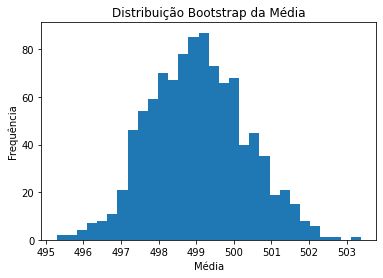

1.289536022494404

In [34]:
def bootstrap(dados, n_iteracoes, estatistica):
    estatisticas_bootstrap = []
    n = len(dados)
    
    for _ in range(n_iteracoes):
        amostra = np.random.choice(dados, size=n, replace=True)
        estatistica_bootstrap = estatistica(amostra)
        estatisticas_bootstrap.append(estatistica_bootstrap)
    
    return estatisticas_bootstrap

# Executar o Bootstrap para estimar a média
estatisticas_bootstrap = bootstrap(dados, n_iteracoes=1000, estatistica=np.mean)
print(f'Média real: {np.mean(dados)}\n')

print(f'Média Bootstrap: {np.mean(estatisticas_bootstrap)}')
print(f'Desvio Padrão Bootstrap: {np.std(estatisticas_bootstrap)}')

# Histograma das estatísticas bootstrap
plt.hist(estatisticas_bootstrap, bins=30)
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.title('Distribuição Bootstrap da Média')
plt.show()


np.std(dados) / np.sqrt(len(dados))

    O Teorema do Limite Central é um dos resultados fundamentais da teoria estatística e afirma que, sob certas condições, a média de uma grande quantidade de amostras independentes de uma população, independentemente da distribuição dessa população, seguirá aproximadamente uma distribuição normal. Isso significa que, mesmo que a população original não seja normalmente distribuída, a distribuição das médias das amostras se aproximará de uma distribuição normal à medida que o tamanho da amostra aumenta.

    O Bootstrap, por outro lado, é um método estatístico que permite estimar a incerteza associada a uma estimativa usando apenas uma amostra dos dados. O Bootstrap é baseado na ideia de reamostragem com reposição, em que várias amostras "fictícias" são criadas a partir da amostra original. Essas amostras bootstrap são usadas para estimar a distribuição amostral de uma estatística, permitindo calcular intervalos de confiança e realizar testes de hipóteses.

    A relação entre o TLC e o Bootstrap reside no fato de que o Bootstrap pode ser visto como uma forma prática de aplicar o TLC.
    
    O Bootstrap usa a reamostragem para simular a variabilidade da amostra original e, assim, obter uma estimativa da distribuição amostral de uma estatística. Essa distribuição amostral, estimada pelo Bootstrap, pode se aproximar da distribuição esperada de acordo com o Teorema do Limite Central.

    Em resumo, o Teorema do Limite Central é um resultado teórico que descreve a distribuição das médias das amostras, enquanto o Bootstrap é um método prático que utiliza a reamostragem para estimar a distribuição amostral de uma estatística. O Bootstrap pode ser considerado uma aplicação do Teorema do Limite Central no contexto da estimação e inferência estatística.

## Nível de confiança e significância

In [38]:
media_amostra = 5050
significancia = 0.05
confianca = 1 - significancia
confianca

0.95

In [47]:
import scipy.stats as stats
import numpy as np

In [44]:
z = stats.norm.ppf(0.95).round(2)
z

1.64

In [45]:
z = stats.norm.ppf(0.975).round(2)
z

1.96

In [46]:
z = stats.norm.ppf(0.995).round(2)
z

2.58

In [48]:
desv_pad = 150
n = 20
raiz_n = np.sqrt(n)


In [49]:
z = stats.norm.ppf(0.975).round(2)
sigma = desv_pad / raiz_n
e = z * sigma

intervalo = (
    media_amostra - e,
    media_amostra + e
)
intervalo

(4984.2596014615065, 5115.7403985384935)

In [50]:
stats.norm.interval(alpha=0.95,loc=media_amostra,scale=desv_pad / raiz_n)

(4984.260809456757, 5115.739190543243)

    "Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

    Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%."

In [55]:
z = stats.norm.ppf(0.95)
desv_pad = 6
n = 50
raiz_n = np.sqrt(n)

sigma = desv_pad / np.sqrt(n)
e = z * sigma
print("R$ {0:0.2f}".format(e))

R$ 1.40


# 6 - Calculando o tamanho da amostra

## População infinita

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

Estamos estudando o rendimento mensal dos chefes de domicílios com renda até R$ 5.000,00 no Brasil. Nosso supervisor determinou que o erro máximo em relação a média seja de R$ 100,00. Sabemos que o desvio padrão populacional deste grupo de trabalhadores é de R$ 3.323,39. 

Para um nível de confiança de 95%, qual deve ser o tamanho da amostra de nosso estudo?

In [3]:
import scipy.stats as stats


z = stats.norm.ppf(0.975)
z


1.959963984540054

In [6]:
sigma = 3323.39
e = 100

In [10]:
n = (z * (sigma / e)) ** 2
int(n.round())

4243

## População finita

#### Com desvio padrão conhecido

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Com desvio padrão desconhecido

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

In [21]:
n = 10000
z = stats.norm.ppf(0.975)
s = 12
e = 5

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

In [22]:
amostra = ((z**2) * (s**2) * (n)) / (((z**2) * (s**2)) + (e**2) * (n-1))
int(amostra.round())

22

# Resumo

Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? 

Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

In [52]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [87]:
np.random.seed(10)
renda = np.random.randint(1500,5000,size=10000)
media = np.mean(renda).round(2)
std = np.std(renda).round(2)

erro = 10

print('Média:',media)
print('Desvio Padrão:',std)

Média: 3264.52
Desvio Padrão: 1013.69


In [88]:
z = stats.norm.ppf(0.975)
z

1.959963984540054

In [89]:
n = (z * (std / erro))**2
n

39473.57914435215

In [90]:
intervalo = stats.norm.interval(alpha=0.95,loc=media,scale=std/np.sqrt(n))
intervalo

(3254.52, 3274.52)

Média real: 3264.5234

Média Bootstrap: 3264.3950904000003
Desvio Padrão Bootstrap: 9.988276168504138
Intervalo de confiança (95%): [3245.0105525 3283.294505 ]


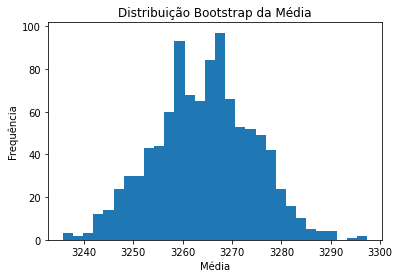

In [113]:
def bootstrap(dados, n_iteracoes, estatistica):
    estatisticas_bootstrap = []
    n = len(dados)
    
    for _ in range(n_iteracoes):
        amostra = np.random.choice(dados, size=n, replace=True)
        estatistica_bootstrap = estatistica(amostra)
        estatisticas_bootstrap.append(estatistica_bootstrap)
    
    return estatisticas_bootstrap

# Executar o Bootstrap para estimar a média
estatisticas_bootstrap = bootstrap(renda, n_iteracoes=1000, estatistica=np.mean)
print(f'Média real: {np.mean(renda)}\n')

print(f'Média Bootstrap: {np.mean(estatisticas_bootstrap)}')
print(f'Desvio Padrão Bootstrap: {np.std(estatisticas_bootstrap)}')

# Calcula o intervalo de confiança de 95% usando os percentis
intervalo_confianca = np.percentile(estatisticas_bootstrap, [2.5, 97.5])

print("Intervalo de confiança (95%):", intervalo_confianca)

# Histograma das estatísticas bootstrap
plt.hist(estatisticas_bootstrap, bins=30)
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.title('Distribuição Bootstrap da Média')
plt.show()

